# Tree Regression
## CS/DSA 5970


In [43]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D


##################
# Default parameters
FIGURESIZE=(10,6)
FONTSIZE=18

plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [3]:
def plot_3d(ins, pred):
    '''
    Plot pred as a function of the 2 dimensions of ins
    '''
    fig = plt.figure(figsize=FIGURESIZE)
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(ins[:,0], ins[:,1], pred, cmap=plt.cm.jet)

## Load Data

In [4]:
fname = '../ml_practices/imports/datasets/misc/svr_data.pkl'
fp = open(fname, 'rb')
ins = pkl.load(fp).T
outs = pkl.load(fp).flatten()
fp.close()

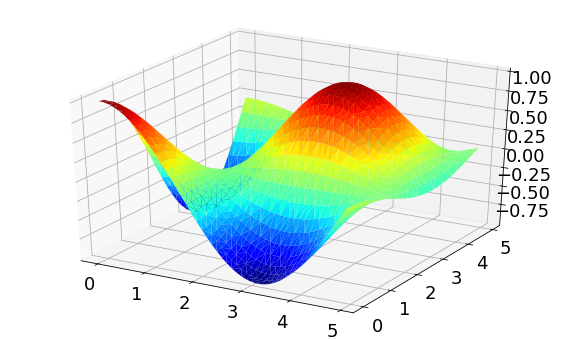

In [18]:
plot_3d(ins,outs)

## Decision Tree Regression

In [57]:
# No constraints
#model = DecisionTreeRegressor()
model = DecisionTreeRegressor(max_depth=2)
#model = DecisionTreeRegressor(max_leaf_nodes=50)

model.fit(ins,outs)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
pred = model.predict(ins)

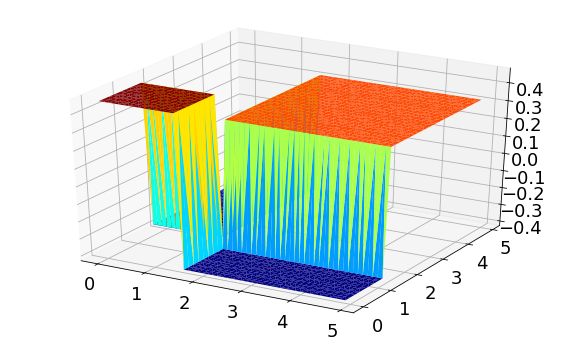

In [59]:
plot_3d(ins,pred)

In [60]:
export_graphviz(model, out_file='model.dot', 
                rounded=True, filled=True)